# Hackathon - Airlines

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv("./airlines_flights_data.csv")

df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [0]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [0]:
df.shape

(300153, 12)

In [0]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

##### no Null Values Quite a Large DataSet 30k 

## Questions & Hypothesis
##### Questions:
 - How does the number of days left until departure affect the flight price?

- Do different airlines have significantly different average prices for the same routes?

- Does the number of stops (direct, 1-stop, 2+ stops) impact the price and total travel time?

- Are morning, afternoon, or evening departures generally more expensive?


##### Hypothesis:
- Flights booked closer to the departure date (fewer days_left) will have higher prices.
- Flights with more stops will generally be cheaper than direct flights.

In [0]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [0]:
df.duplicated().value_counts()

False    300153
dtype: int64

In [0]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [0]:
df.iloc[10:20]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10,10,GO_FIRST,G8-392,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954
11,11,GO_FIRST,G8-338,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5954
12,12,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
13,13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955
14,14,Indigo,6E-549,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5955
15,15,Indigo,6E-6278,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
16,16,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,1,5955
17,17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
18,18,AirAsia,I5-747,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1,5949
19,19,AirAsia,I5-747,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1,5949


### Data Cleaning & Transformation

- No Null Data
- No Duplicates


In [0]:
df["stops"].values

array(['zero', 'zero', 'zero', ..., 'one', 'one', 'one'], dtype=object)

In [0]:
df["stops"].value_counts()


one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [0]:
df["flight"].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [0]:
df["flight"].duplicated().value_counts()

True     298592
False      1561
Name: flight, dtype: int64

In [0]:
# The most repeated/ visited City

df["destination_city"].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [0]:
# The most Departed  City from

df["source_city"].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [0]:
# which stop is the most repeated

df["stops"].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [0]:
# Find the most expensive ticket by destination city

df_highest = df.groupby('destination_city')['price'].max().reset_index()
df_highest

,destination_city,price
0,Bangalore,114523
1,Chennai,111964
2,Delhi,123071
3,Hyderabad,114705
4,Kolkata,117307
5,Mumbai,115211


In [0]:
#Find the Cheapest ticket for a destiantion city

df_lowest = df.groupby('destination_city')['price'].min().reset_index()
df_lowest

,destination_city,price
0,Bangalore,1443
1,Chennai,1543
2,Delhi,2051
3,Hyderabad,1105
4,Kolkata,2056
5,Mumbai,1830


In [0]:
# Data showing Days left and price by price and days left

df_days_left_order = df.groupby(['days_left','price']).count()

df_days_left_order.tail()

index  airline  flight  ...  destination_city  class  duration
days_left price                          ...                                   
49        84222      1        1       1  ...                 1      1         1
          84756      3        3       3  ...                 3      3         3
          85249      1        1       1  ...                 1      1         1
          89729      2        2       2  ...                 2      2         2
          92027      1        1       1  ...                 1      1         1

[5 rows x 10 columns]


#### Data Visualisation

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


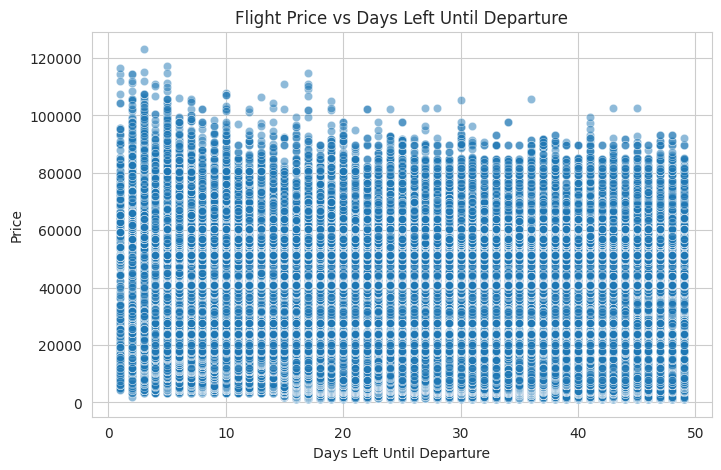

In [0]:
# 1. Days left vs Price (Hypothesis 1)
# ----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='days_left', y='price', alpha=0.5)
plt.title("Flight Price vs Days Left Until Departure")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Price")
plt.show()

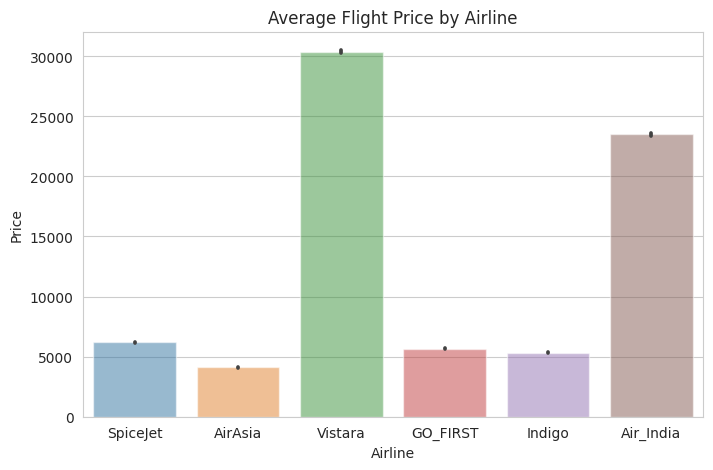

In [0]:
# ----------------------------
# 2. Airline vs Average Price (per route)
# ----------------------------

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='airline', y='price', alpha=0.5)
plt.title("Average Flight Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

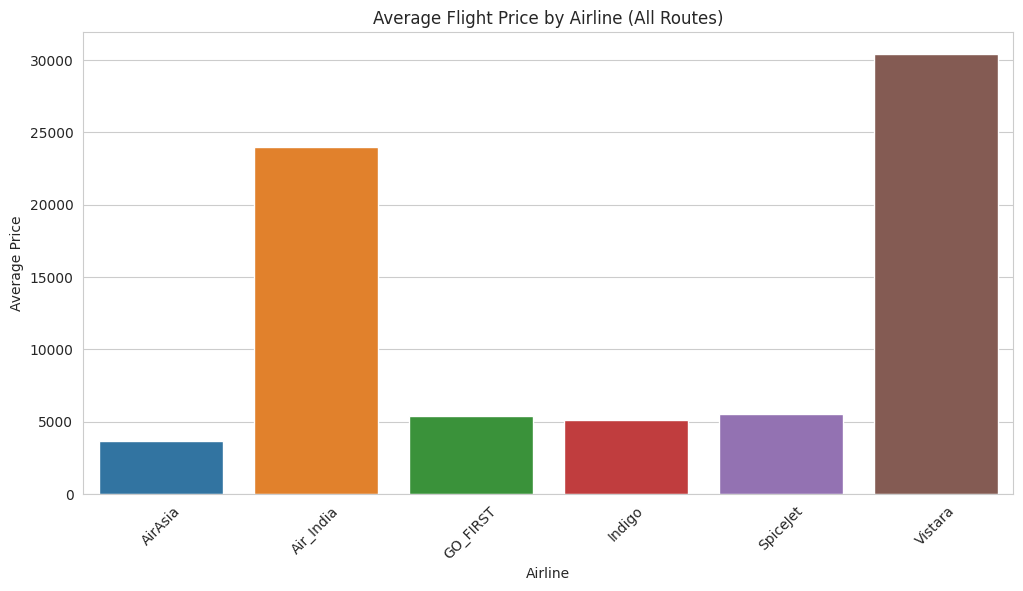

In [0]:
# ----------------------------
# 2. Airline vs Average Price (per route)
# ----------------------------
plt.figure(figsize=(12,6))
avg_prices = df.groupby(['airline', 'source_city', 'destination_city'])['price'].mean().reset_index()
sns.barplot(data=avg_prices, x='airline', y='price', errorbar=None)
plt.title("Average Flight Price by Airline (All Routes)")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.xlabel("Airline")
plt.show()

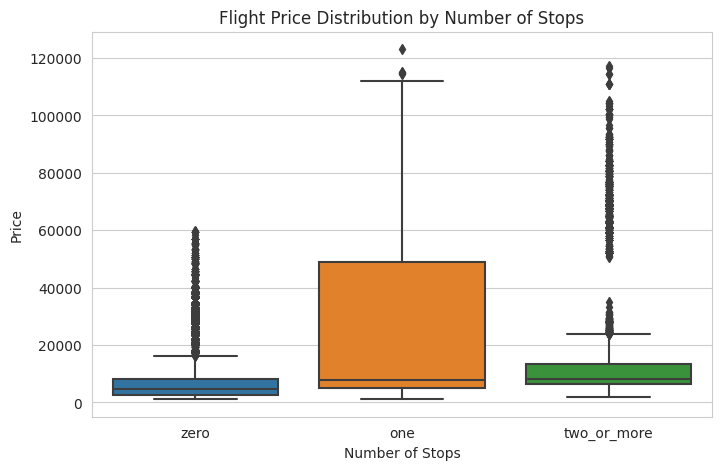

In [0]:
# 3. Stops vs Price & Duration (Hypothesis 2)
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='stops', y='price')
plt.title("Flight Price Distribution by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()



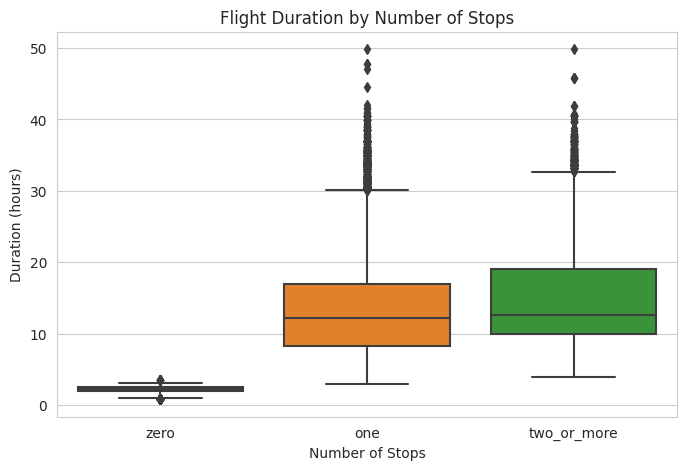

In [0]:
# 3. Stops vs Price & Duration (Hypothesis 2)
# ----------------------------

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='stops', y='duration')
plt.title("Flight Duration by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Duration (hours)")
plt.show()


#### Machine Learning Predictions

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [0]:
# ----------------------------
#  relevant predictors (you can add/remove based on EDA results)
#  convert categorical columns to numeric via one-hot encoding
features = ['airline', 'source_city', 'destination_city', 'class', 'stops', 'days_left', 'duration']
X = pd.get_dummies(df[features], drop_first=True)

# Target variable
y = df['price']

In [0]:
# ----------------------------
# 3. Train/Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [0]:
# ----------------------------
# 4. Model Selection & Training
# ----------------------------
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [0]:
# ----------------------------
# 5. Predictions & Evaluation
# ----------------------------
y_pred = model.predict(X_test)


In [0]:
# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Model Performance:
R² Score: 0.9107
Mean Absolute Error: 4561.40
Root Mean Squared Error: 6784.18
